In [353]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from langchain_community.llms.ollama import Ollama

# Plasticity of the Model tests

Here can be used to view how each model outputs a response. Can be used to do a personal preference assessment of each output as a first step.

In [344]:
example_prompts = ["is the sky blue", "Hello", "I need help with staying healthy"]
model_names = [f"hal{i}000:latest" for i in range(0,11)]
for model in model_names:
    llm=Ollama(model=model)
    out1=llm.invoke(example_prompts[2])
    #print(f"{model} answered: {out1}\n{"*"*20}\n{"#"*20}")


# Get Data

We load the data which contains responses for prompts in *prompts.json* for all selected models with tuned system prompts. For each prompt also includes time taken to respond.

Following models are used:
1. phi2:2.7
2. phi2:chat
3. llama2:7b
4. llama2:7b:chat
5. llava2:7b
6. llava2:13b
7. mistral:7b:instruct
8. mistral:7b:latest
9. neural-chat:7b
10. tinyllama:1.1b:chat
11. gemma:2b:instruct

In [345]:
with open("./ollama_out.json", "r") as file:
    json_data = json.load(file)
df = pd.DataFrame(json_data)
df['model_names'] = df['model_names'].str.replace(":latest","")
df.columns

Index(['model_names', 'prompt_ids', 'prompt_texts', 'prompt_responses',
       'prompt_times'],
      dtype='object')

In [346]:
def get_word_count(sentence):
    return len(sentence.split(" ")) 

In [347]:
model_names = df["model_names"].unique()
df["prompt_responses_len"] = df["prompt_responses"].apply(get_word_count)
df["wps"] = df["prompt_responses_len"] / df["prompt_times"]

for model in model_names:
    path = df["model_names"] == model

    mean_time = df[path]["prompt_times"].mean()
    mean_responses_len = df[path]["prompt_responses_len"].mean()    
    mean_wps = df[path]["wps"].mean()

    print(f"""
{model} mean statistics
-- {mean_time:.2f} seconds
-- {mean_responses_len:.2f} words
-- {mean_wps:.2f} words per second""")


hal0000 mean statistics
-- 12.37 seconds
-- 482.22 words
-- 39.32 words per second

hal1000 mean statistics
-- 12.46 seconds
-- 503.76 words
-- 41.16 words per second

hal2000 mean statistics
-- 2.06 seconds
-- 38.02 words
-- 14.62 words per second

hal3000 mean statistics
-- 3.25 seconds
-- 54.51 words
-- 13.93 words per second

hal4000 mean statistics
-- 2.79 seconds
-- 55.04 words
-- 19.80 words per second

hal5000 mean statistics
-- 1.66 seconds
-- 19.67 words
-- 10.44 words per second

hal6000 mean statistics
-- 5.17 seconds
-- 78.42 words
-- 15.18 words per second

hal7000 mean statistics
-- 5.35 seconds
-- 83.73 words
-- 15.66 words per second

hal8000 mean statistics
-- 2.82 seconds
-- 51.73 words
-- 16.81 words per second

hal9000 mean statistics
-- 1.57 seconds
-- 141.69 words
-- 90.50 words per second

hal10000 mean statistics
-- 1.22 seconds
-- 55.62 words
-- 44.88 words per second


# Analysis on:

* inference speed
* response length
* word count per second

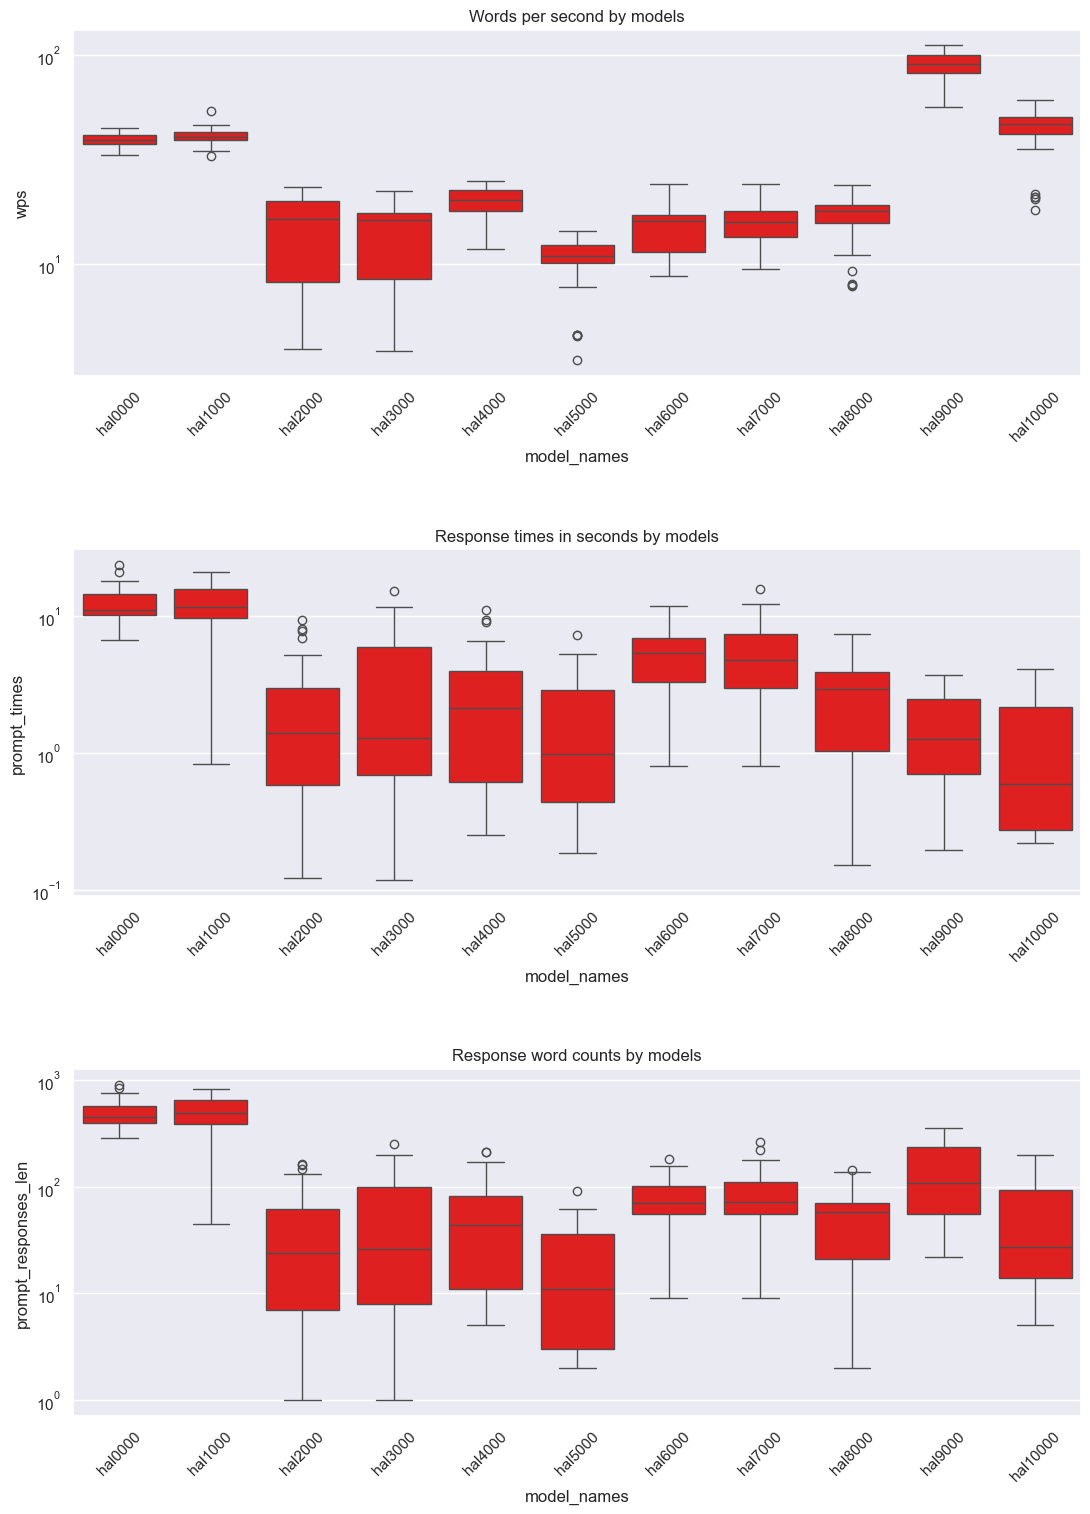

In [373]:
ENABLE_LOG_SCALE = True

fig, ax = plt.subplots(3, 1 , figsize=(13,18))

sns.boxplot(x='model_names', y='wps', data=df, ax=ax[0], color="red")
ax[0].tick_params(rotation=45, axis="x")
#ax[0].set_yscale('log')
ax[0].set_title("Words per second by models")

sns.boxplot(x='model_names', y='prompt_times', data=df, ax=ax[1], color="red")
ax[1].tick_params(rotation=45, axis="x")
#ax[1].set_yscale('log')
ax[1].set_title("Response times in seconds by models")

sns.boxplot(x='model_names', y='prompt_responses_len', data=df, ax=ax[2], color="red")
ax[2].tick_params(rotation=45, axis="x")
#ax[2].set_yscale('log')
ax[2].set_title("Response word counts by models")

if ENABLE_LOG_SCALE:
    ax[0].set_yscale('log')
    ax[1].set_yscale('log')
    ax[2].set_yscale('log')

plt.subplots_adjust(hspace=0.5)
plt.show()

# OLD PART

# Load Data

In [20]:
#with open("./ollama_out.json", 'r') as file:
#    json_data = json.load(file)

# Create Dataframe

In [25]:
"""base_names = ["phi2:2.7", "phi2:chat", "llama2:7b", "llama2:7b:chat", "llava2:7b", "llava2:13b", "mistral:7b:instruct", "mistral:7b:latest", "neural-chat:7b", "tinyllama:1.1b:chat", "gemma:2b:instruct"]
new_names = []
for key in json_data.keys():
    new_names.append(f"{key}")
    
data = {"mean":[None for i in range(11)],
    "max":[None for i in range(11)],
    "min":[None for i in range(11)],
    "std":[None for i in range(11)],
    "median":[None for i in range(11)],
    "variance":[None for i in range(11)]}

df_speed = pd.DataFrame(data=data, index=new_names)
prompts = [f"prompt_{i}" for i in range(9)]
for model_name in json_data.keys():
    mean_time= []
    max_time = []
    min_time = []
    std_time = []
    median_time = []
    variance_time = []
    for prompt in prompts:
        stats = json_data[model_name][model_name][prompt]['time_ls']
        mean_time.append(np.mean(stats))
        max_time.append(np.max(stats))
        min_time.append(np.min(stats))
        std_time.append(np.std(stats))
        median_time.append(np.median(stats))
        variance_time.append(np.var(stats))
    df_speed.loc[model_name, "mean"] = np.mean(mean_time)
    df_speed.loc[model_name, "max"] = np.mean(max_time)
    df_speed.loc[model_name, "min"] = np.mean(min_time)
    df_speed.loc[model_name, "std"] = np.mean(std_time)
    df_speed.loc[model_name, "median"] = np.mean(median_time)
    df_speed.loc[model_name, "variance"] = np.mean(variance_time)"""

In [29]:
"""print(df_speed)"""

                      mean        max       min       std     median  variance
hal0000:latest   11.049726  12.158017  9.941436   1.10829  11.049726  2.435282
hal1000:latest    9.263446  11.971134  6.555757  2.707689   9.263446  18.47316
hal2000:latest    6.488203   8.162406  4.814001  1.674203   6.488203  7.515539
hal3000:latest     8.30513   9.499569  7.110691  1.194439    8.30513    4.5875
hal4000:latest    5.339737   6.736031  3.943443  1.396294   5.339737  4.110405
hal5000:latest    7.100469   8.180498   6.02044  1.080029   7.100469  1.939389
hal6000:latest    7.974267   9.656914  6.291619  1.682647   7.974267  4.861753
hal7000:latest    7.294879   8.359022  6.230735  1.064143   7.294879  1.342113
hal8000:latest     7.80681   8.871983  6.741638  1.065172    7.80681  1.705915
hal9000:latest    1.812049   2.188055  1.436044  0.376005   1.812049  0.222088
hal10000:latest   2.726248   2.935577   2.51692  0.209328   2.726248  0.111513
